# 시작

In [16]:
# 라이브러리 불러오기
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [17]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/train.csv')

In [18]:
df.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [19]:
# 데이터 칼럼 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [20]:
# 결측치 확인
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

<Axes: >

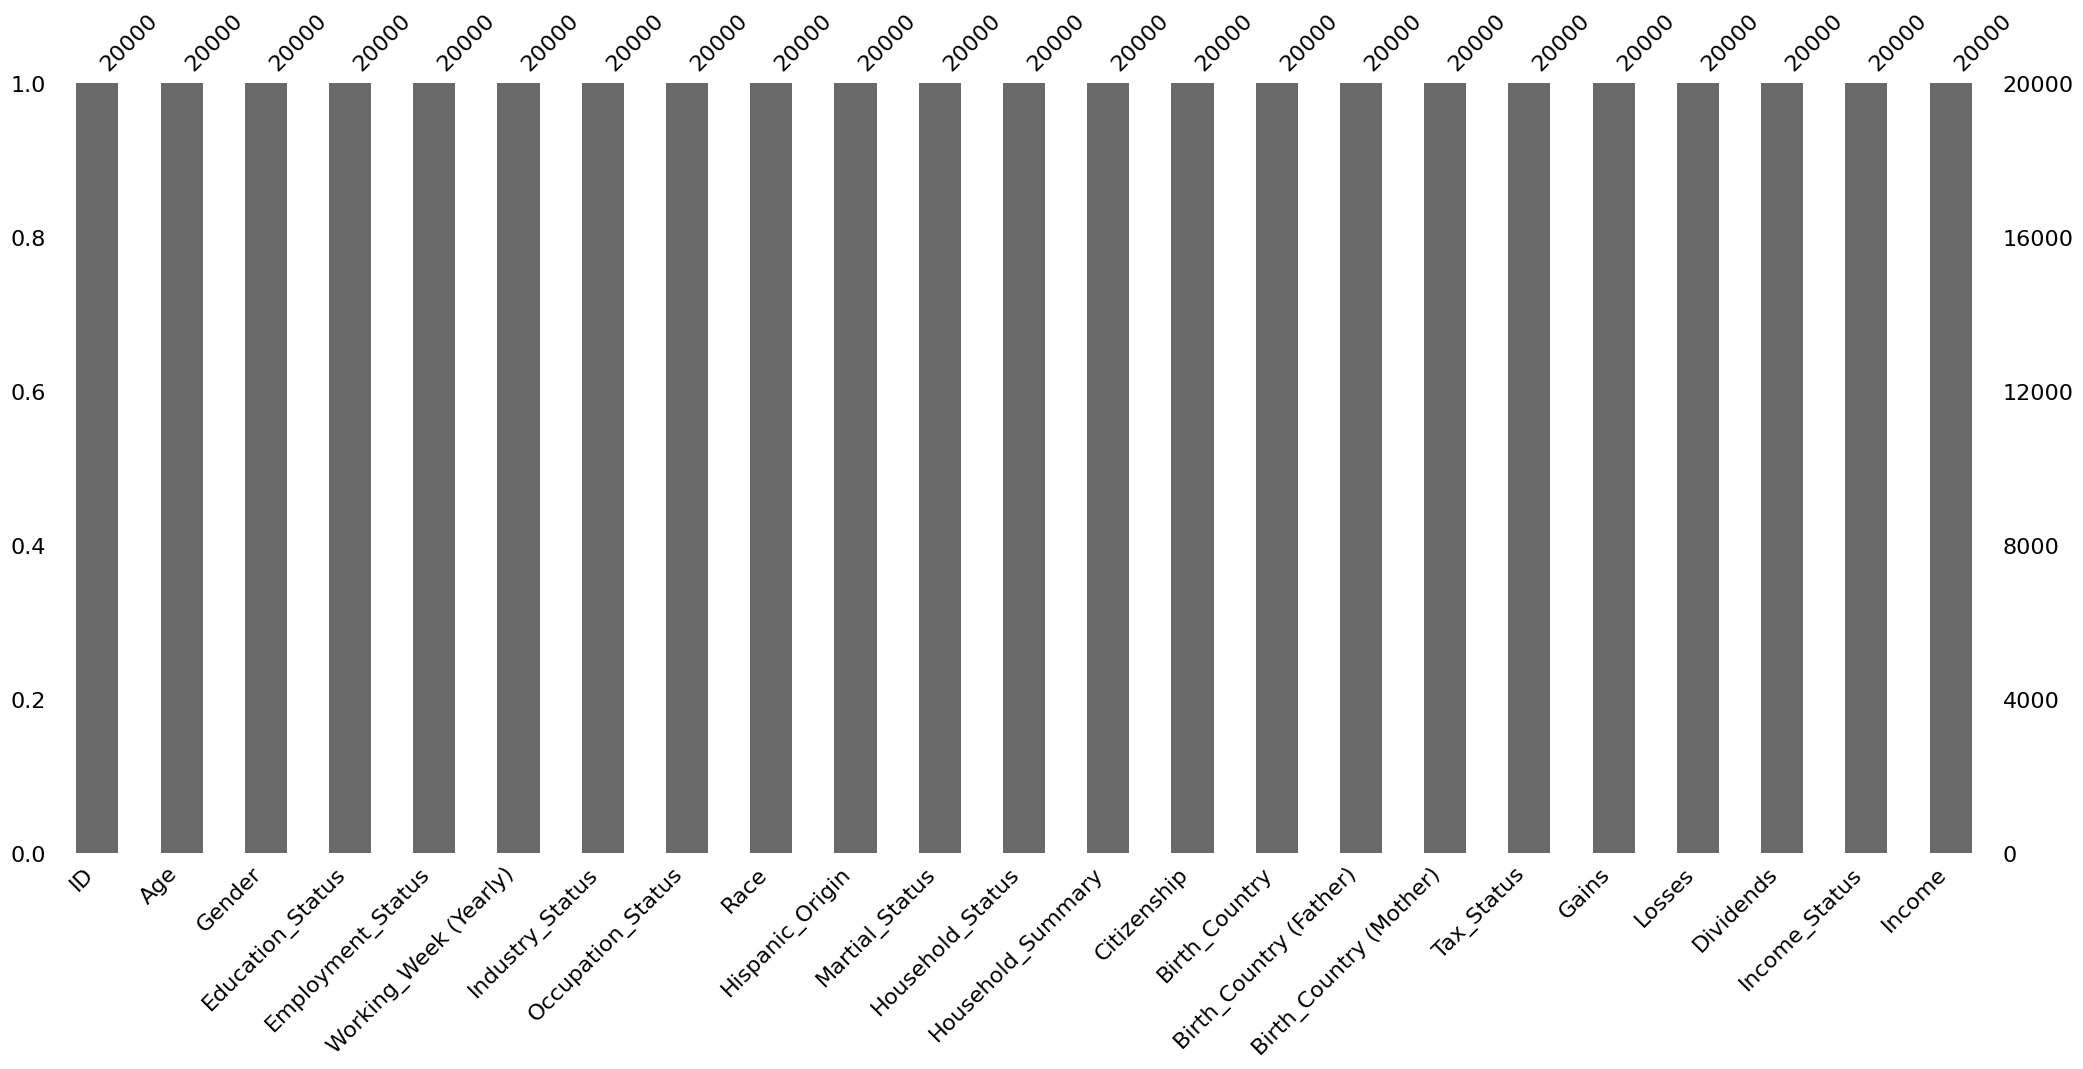

In [21]:
import missingno as msno

msno.bar(df)

- 연속형 변수와 범주형 변수 정리하기
  -  연속형    
    'Age' : 나이    
    'Working_Week (Yearly)' : 주당 근무시간   	    
    'Gains' : 소득    
    'Losses' : 손실    
    'Dividends' : 배당금     
    'Income' : 1시간 단위 소득    
  - 범주형    
    'Gender' : 성별    
    'Education_Status' : 교육수준    
    'Employment_Status' : 고용 상태    
    'Industry_Status' : 산업 상태    
    'Occupation_Status': 직업 상태    
    'Race' : 인종    
    'Hispanic_Origin' : 히스패닉 기원     
    'Martial_Status' : 결혼 상태    
    'Household_Status' : 가정 상태
    'Household_Summary': 가정 요약    
    'Citizenship' : 시민권    
    'Birth_Country' : 출생지    
    'Birth_Country (Father)' : 출생지(아버지)    
    'Birth_Country (Mother)' : 출생지(어머니)    
    'Tax_Status' : 세금 상태    
    'Income_Status' : 소득 상태    

In [22]:
# dtype이 int임에도 범주형 변수일 수도 있기에 확인하고 데이터 타입 바꿔주기 / 여기서는 전처리가 된 상태로 보임
# df['column명'] = df['column명'].astype(dtype)

# df_numeric = df.select_dtypes(include=['int']).columns
# df_category = df.select_dtypes(include=['object']).columns

In [23]:
df_numerical = ['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']
df_categorical = ['Gender', 'Education_Status', 'Employment_Status', 'Industry_Status',
 'Occupation_Status', 'Race',
 'Hispanic_Origin', 'Martial_Status',
 'Household_Status', 'Household_Summary',
 'Citizenship', 'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status', 'Income_Status']

In [24]:
# 각 칼럼 값 확인
# column_values_dict = {}
# for i in df_column_categorical:
#     column_values_dict[i] = df[i].unique().tolist()

# test_df = column_values_dict
# 통계적인 부분을 보면서 이해할 수 있는 부분..!

# 변수 파악하기

### 연속형 변수 파악하기

In [25]:
df.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


In [26]:
# 시각화 쉽게 만들어 볼 수 있도록 함수 만들기
# 히스토그램
def make_hist(df):
    plt.hist(df, bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {df.name}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# boxplot
def make_boxplot(df):
    plt.boxplot(df)
    plt.title(f"Histogram of {df.name}")
    plt.ylabel('Value')

- Age 분포

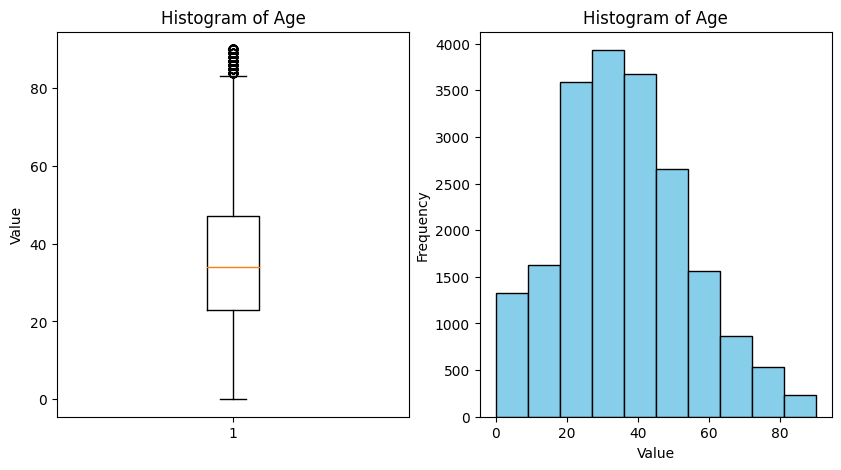

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
make_boxplot(df['Age'])

plt.subplot(1,2,2)
make_hist(df['Age'])
plt.show()

In [28]:
# 연령대별로 묶어서 보는 방법


- Working_week(Yearly)

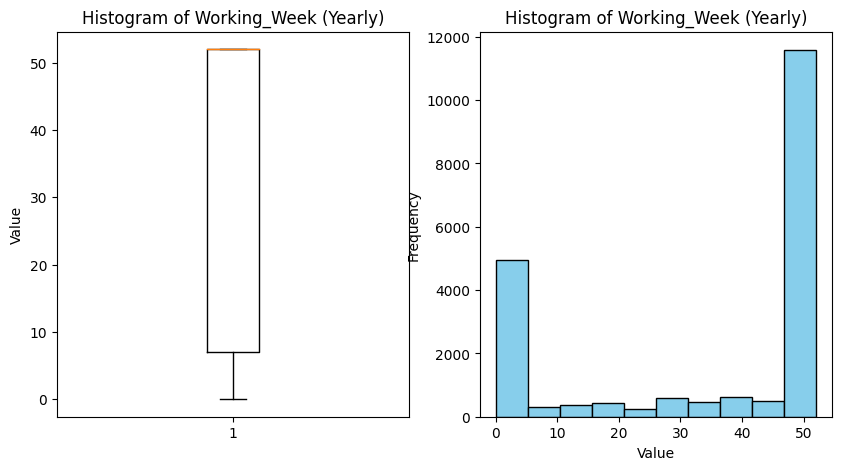

count    20000.000000
mean        34.943050
std         22.254592
min          0.000000
25%          7.000000
50%         52.000000
75%         52.000000
max         52.000000
Name: Working_Week (Yearly), dtype: float64

In [29]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
make_boxplot(df['Working_Week (Yearly)'])

plt.subplot(1,2,2)
make_hist(df['Working_Week (Yearly)'])
plt.show()

display(df['Working_Week (Yearly)'].describe())

- Income

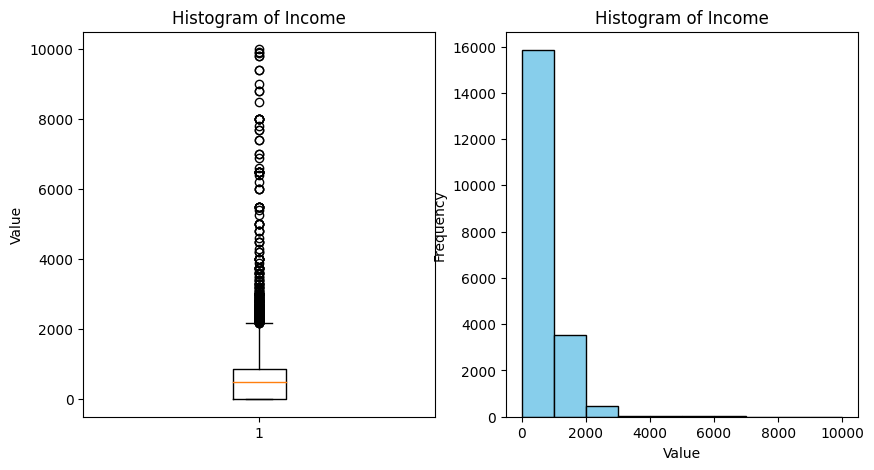

count    20000.000000
mean       554.565250
std        701.553155
min          0.000000
25%          0.000000
50%        500.000000
75%        875.000000
max       9999.000000
Name: Income, dtype: float64

In [30]:
# 분포 확인
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
make_boxplot(df['Income'])

plt.subplot(1,2,2)
make_hist(df['Income'])
plt.show()

display(df['Income'].describe())

범주형 변수의 값 별로 Income - count sum mean 을 하고 있는데 이상치 값들의 영향을 얼마나 받는지 궁금해서 IQR 계산

In [31]:
Q1 = df['Income'].quantile(q=0.25)
Q3 = df['Income'].quantile(q=0.75)
IQR = Q3 - Q1

In [32]:
# 이상치를 제외하고 계산했을 때 차이가 있을지 파악할 예정.
df[df['Income'] > Q3 + 1.5*IQR]['Income'].count()

397

이상치에 해당하는 수가 397명

In [33]:
# 이상치에 해당하는 df
outlier_df = df[df['Income'] > Q3 + 1.5*IQR]
# 이상치 제외한 df
in_df = df[df['Income'] <= Q3 + 1.5*IQR]

- Gains

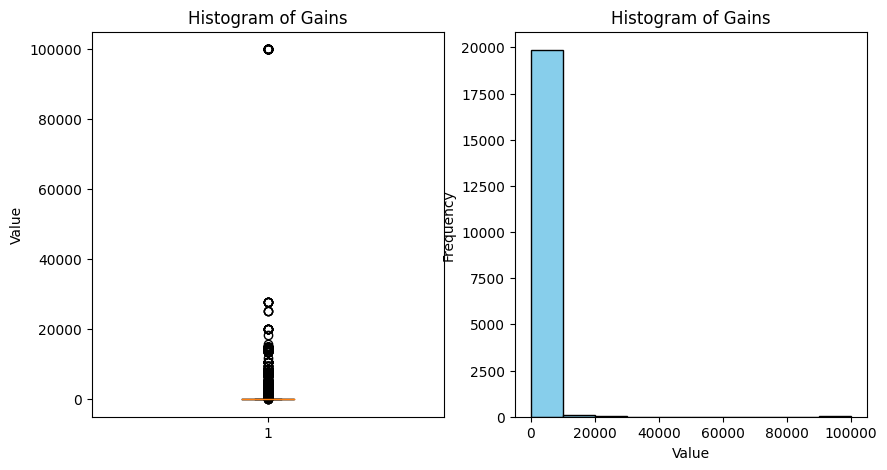

count    20000.000000
mean       383.129500
std       4144.247487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Gains, dtype: float64

In [34]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
make_boxplot(df['Gains'])

plt.subplot(1,2,2)
make_hist(df['Gains'])
plt.show()

display(df['Gains'].describe())

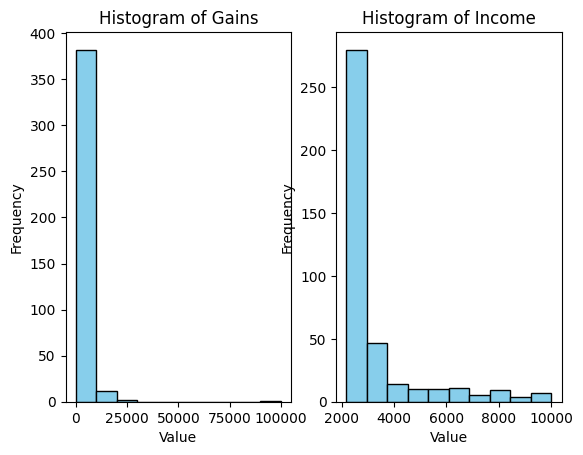

In [35]:
plt.subplot(1,2,1)
make_hist(outlier_df['Gains'])

plt.subplot(1,2,2)
make_hist(outlier_df['Income'])
plt.show()

- Losses

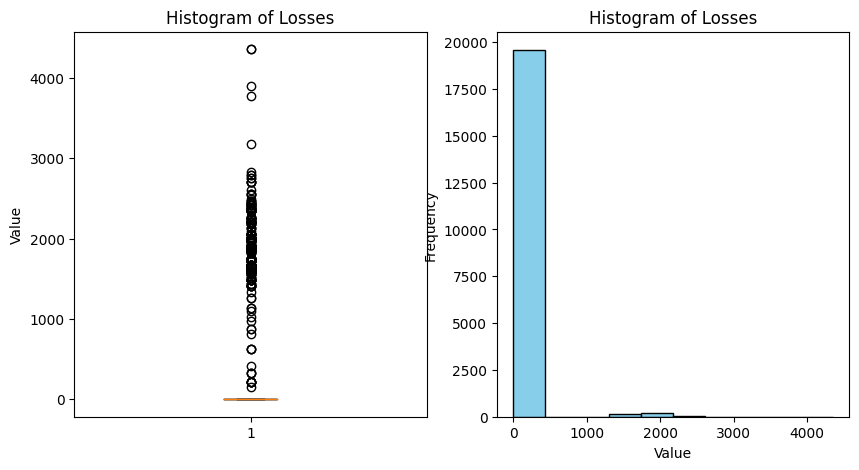

count    20000.000000
mean        40.202150
std        279.182677
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Losses, dtype: float64

In [36]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
make_boxplot(df['Losses'])

plt.subplot(1,2,2)
make_hist(df['Losses'])
plt.show()

display(df['Losses'].describe())

- Dividends

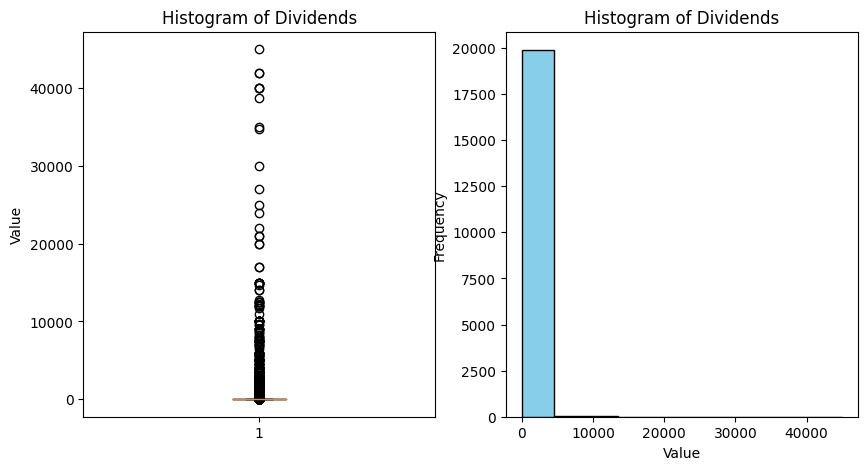

count    20000.000000
mean       123.451450
std       1206.949429
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45000.000000
Name: Dividends, dtype: float64

In [37]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
make_boxplot(df['Dividends'])

plt.subplot(1,2,2)
make_hist(df['Dividends'])
plt.show()

display(df['Dividends'].describe())

- 연속형 변수간 pairplot 시각화를 통해 관계 보기

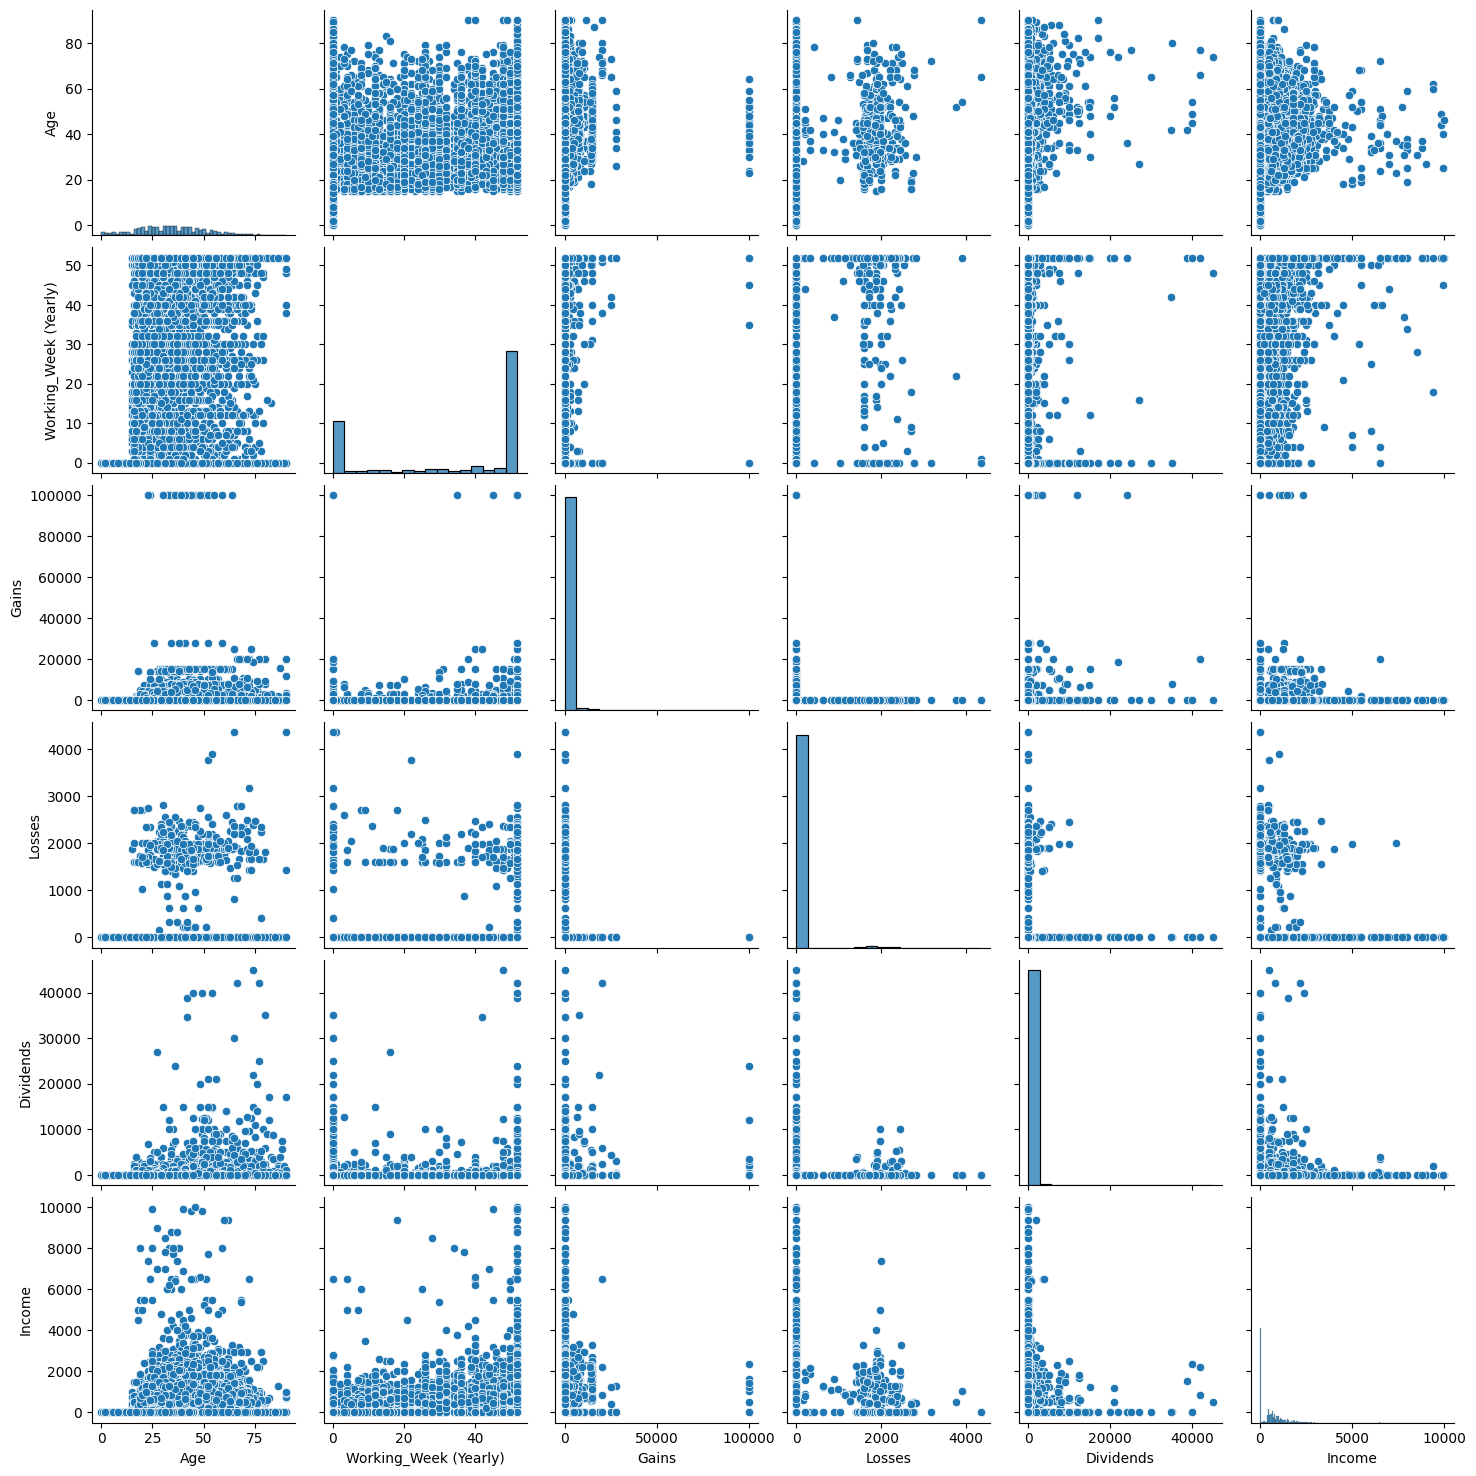

In [38]:
sns.pairplot(df[df_numerical])
# gain / losses 가 0을 제외해보면?
# 나이에 따른 소득 분포가 나이 분포와 비슷?
# working_week 과 income과의 상관관계가 있을까 싶었으나 없는 것 같아 보임

- 범주형 데이터 분포 확인

In [ ]:
# 칼럼 확인
df_categorical

1) 'Gender'

In [ ]:
df.groupby('Gender')['Income'].agg(['count','sum','mean'])
# 남녀 944명 차이, 여성이 남성보다 수가 적음에도 소득 평균과 합계가 높다

In [ ]:
display(in_df.groupby('Gender')['Income'].agg(['count','sum','mean']))
display(outlier_df.groupby('Gender')['Income'].agg(['count','sum','mean']))

2) 'Education_Status'

In [ ]:
# def groupby_count(i):
#     display(df.groupby(i)['Income'].agg({'count','sum','mean'}))

In [ ]:
df.groupby('Education_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False)
#Associates degree : 준학사 학위 (Vocational : 직업적인 / Academic : 학구적)
#Bachelors Degree : 학사 학위
#College : 흔히 2년제 대학
#Masters : 석사
#Doctorate : 박사
#Professional : 전문 학위(의사, 변호사 등)

In [ ]:
display(in_df.groupby('Education_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))

Doctorate degree에서 큰 차이가 생겨버림

In [ ]:
display(outlier_df.groupby('Education_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))

3) Employee

- Occupation_Status

In [ ]:
df.groupby('Occupation_Status')['Income'].agg(['count','sum','mean']).sort_values(by='mean',ascending = False)
# 직업에 따른 Income 비교

In [ ]:
display(in_df.groupby('Occupation_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))

NameError: name 'in_df' is not defined

In [ ]:
display(outlier_df.groupby('Occupation_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))

Q. Unkown과 다른 변수간의 관계가 어떻게 될까

In [ ]:
# Not in universe or children으로 구성되어 있음
df[df['Occupation_Status'] == 'Unknown'].groupby('Industry_Status')['Income'].count()

In [ ]:
make_hist(df[df['Occupation_Status'] == 'Unknown']['Age'])
plt.show()

학샘만 있을 줄 알았으나 다양한 연령대가 있음을 확인

- Hispanic_Origin

In [ ]:
# 'Hispanic_Origin'
df.groupby('Hispanic_Origin')['Income'].agg(['count','sum','mean']).sort_values(by='mean',ascending=False)
# Chicano 미국에서 거주하는 멕시코계 사람

In [ ]:
display(in_df.groupby('Hispanic_Origin')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))

In [ ]:
display(outlier_df.groupby('Hispanic_Origin')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))

In [ ]:
# 칼럼 value에 왼쪽 공백이 있음을 확인
# 왼쪽 공백이 있어 공백제거
df['Hispanic_Origin'] = df['Hispanic_Origin'].str.strip()

In [ ]:
# NA값과 Do not Know 관련해서 살펴보기
his = df[df['Hispanic_Origin'] == 'NA']
# his = df[df['Hispanic_Origin'] == 'Do not know']

In [ ]:
his.groupby('Race')['Income'].count()

In [ ]:
his.groupby('Citizenship')['Income'].count()

In [ ]:
his.groupby('Birth_Country')['Income'].count()

In [ ]:
his[df['Birth_Country'] == 'US'].head()
# df[(df['Hispanic_Origin'] == 'NA') & (df['Birth_Country'] == 'US')]

In [ ]:
# 출생지에 따라 Orgin이 어떤지 분포 확인
df[(df['Birth_Country'] == 'Jamaica')].groupby('Hispanic_Origin')['ID'].count()

- Hispanic_Origin == NA 이면서 birth_Country != US에 있는 나라들 확인
  >US - 과반수 All other    
  Germany - 과반수 All other    
  Philippines - 과반수 All other    
  Mexico -> 과반수 Mexican (Mexicano)    
  Cuba -> 과반수 Cuban    
  Jamaica -> 과반수 All other    
  Nicaragua -> 과반수 Central or South American    
  Unknown -> 과반수 All other    
  Canada / Italy -> All other    
    
- Hispanic_origin == Do not know 경우    
  >출생지가 전부 US이며 - 과반수 ALL other

- Birth_Country

In [ ]:
df.groupby('Birth_Country')['Income'].agg(['count','mean']).sort_values(by='count',ascending=False)

In [ ]:
df[(df['Birth_Country'] == 'Unknown')].head(1)

In [ ]:
# Unknown일 때 Hispanic 분포 확인
df[(df['Birth_Country'] == 'Unknown')].groupby('Hispanic_Origin')['Income'].agg(['count','mean']).sort_values(by='count',ascending=False)

In [ ]:
df[((df['Birth_Country'] == 'Unknown')) &
   ((df['Birth_Country (Father)'] == 'Unknown')) &
   ((df['Birth_Country (Mother)'] == 'Unknown'))]['Income'].describe()

In [ ]:
make_hist(df[((df['Birth_Country'] == 'Unknown')) &
   ((df['Birth_Country (Father)'] == 'Unknown')) &
   ((df['Birth_Country (Mother)'] == 'Unknown'))]['Income'])

In [ ]:
df[(df['Hispanic_Origin'] == 'Other Spanish')].groupby('Birth_Country')['Income'].agg(['count','mean']).sort_values(by='count',ascending=False)

- Income_Status

In [ ]:
# oer under unknown 검정통계량 비교
df[df['Income_Status'] == 'Over Median'].describe()

In [ ]:
df[df['Income_Status'] == 'Under Median'].describe()

In [ ]:
df[df['Income_Status'] == 'Unknown'].describe()

In [ ]:
make_hist(df[df['Income_Status'] == 'Under Median']['Gains'])

In [ ]:
df.groupby('Income_Status')['Income'].agg(['count','max','min','mean'])

Q. Income_Status와 다른 변수간 관계가 어떤지 살펴보기

In [ ]:
# Working_Week와 관계
make_hist(df[df['Income_Status'] == 'Over Median']['Working_Week (Yearly)'])

In [ ]:
make_hist(df[df['Income_Status'] == 'Under Median']['Working_Week (Yearly)'])

NameError: name 'make_hist' is not defined

Income이 0인 수가 많을 뿐 분포가 비슷한 것 같다.

In [ ]:
# Income_status 연령별 분포 확인
make_hist(df[df['Income_Status'] == 'Unknown']['Age'])

In [ ]:
make_hist(df[df['Income_Status'] == 'Over Median']['Age'])

In [ ]:
make_hist(df[df['Income_Status'] == 'Under Median']['Age'])

연령별 분포에 있어서 비슷하다

In [ ]:
# Industry나 Occupation 혹은 Educational
df[df['Income_Status'] == 'Over Median'].groupby('Education_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False)

In [ ]:
df[df['Income_Status'] == 'Under Median'].groupby('Education_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False)

우선..인원 수로만 비교해서 봤을 때 Occupation이나 Industry, Education 관계가 있어 보이지 않다.


In [ ]:
# Tax_Status 관계
df[df['Income_Status'] == 'Over Median'].groupby('Tax_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False)

In [ ]:
df[df['Income_Status'] == 'Under Median'].groupby('Tax_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False)

In [ ]:
display(df.groupby('Income_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))
# 이상치가 아닌 df
display(in_df.groupby('Income_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))
# 이상치에 해당하는 df의 Income_Status 구성
display(outlier_df.groupby('Income_Status')['Income'].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))

In [ ]:
# 'Working_Week (Yearly)'

In [ ]:
df[df['Income_Status'] == 'Unknown'].groupby('Occupation_Status')[['Income']].agg(['count','sum','mean']).sort_values(by = 'mean', ascending = False))

SyntaxError: unmatched ')' (<ipython-input-1-ec4cebb5a601>, line 1)

In [ ]:
m

- 분포그리기(just try 부분)

In [ ]:
# seaborn countplot
def make_countplot(i) :
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=i)
    plt.title(f"Distribution of {i.name}")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
make_countplot(df['Education_Status'])

In [ ]:
# ~에 따른 소득 평균 (?)
edu_in = df.groupby('Education_Status')[['Income']].mean().sort_values(by = 'Income',ascending = False)

In [ ]:
edu_in.plot(kind = 'bar')
plt.title('Average Income according to Education_Status')
plt.xticks(rotation=90)
plt.show()